# CUDA Mnist Classifier: Performance Comparison

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from utl.style import MyStyle
Style = MyStyle()
Style.set_style()
Style.use_latex(True)

## First Eval: NVIDIA L40S

,date,time,mode,batch_size,max_epochs,lr,accuracy,eval_size,total_time,data_prep_time,...,final_eval_time,cuda_device,compute_cap,total_glob_mem,block_shared_mem,block_registers,warp_size,block_max_threads,multiproc_max_threads,multiproc_count
0,2025-09-01,18:51:04,CPU,4,5,0.004,0.9171,1000,62.5475,0.936057,...,0.587356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-09-01,18:52:21,CUDA,4,5,0.004,0.9046,1000,68.8636,1.267440,...,0.245248,NVIDIA L40S,8.9,45589.0,48.0,65536.0,32.0,1024.0,1536.0,142.0
2,2025-09-01,18:54:18,CPU,8,5,0.008,0.9171,1000,57.1330,0.954378,...,0.590564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-09-01,18:55:07,CUDA,8,5,0.008,0.9050,1000,36.6719,0.902314,...,0.241896,NVIDIA L40S,8.9,45589.0,48.0,65536.0,32.0,1024.0,1536.0,142.0
4,2025-09-01,18:58:20,CPU,16,5,0.016,0.9171,1000,55.3525,0.908187,...,0.586276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[]

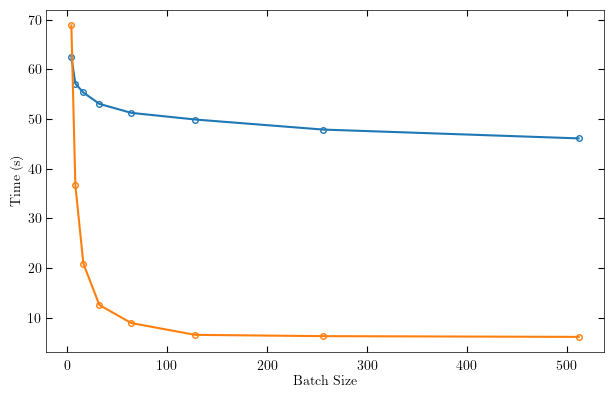

In [ ]:
csv_name = 'eval1.csv'
eval_csv = pd.read_csv(csv_name)
display(eval_csv.head())

cuda_df = eval_csv[eval_csv['mode'] == 'CUDA']
cpu_df = eval_csv[eval_csv['mode'] == 'CPU']

Style.set_width(7.2,1)
fig, ax = plt.subplots(figsize=Style.get_figsize())
ax.plot(cpu_df["batch_size"], cpu_df["total_time"], marker="o", label="CPU total time", color=Style.get_color(1))
ax.plot(cuda_df["batch_size"], cuda_df["total_time"], marker="o", label="CUDA total time", color=Style.get_color(2))

ax.set_xlabel("Batch Size")
ax.set_ylabel("Time (s)")

plt.plot()

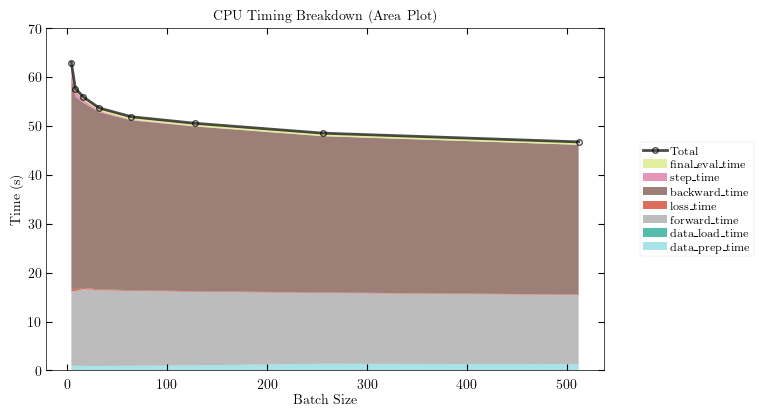

CPU Timing Breakdown:


,batch_size,data_prep_time,data_load_time,forward_time,loss_time,backward_time,step_time,final_eval_time,total_calculated,total_reported
0,4,0.936057,0.075745,15.1568,0.550708,43.4383,2.142230,0.587356,62.887196,62.5475
2,8,0.954378,0.038767,15.1802,0.354237,39.3730,1.111100,0.590564,57.602246,57.1330
4,16,0.908187,0.021229,15.6915,0.247719,37.8375,0.580786,0.586276,55.873197,55.3525
6,32,0.909907,0.010528,15.4618,0.189305,36.1695,0.287045,0.584030,53.612115,53.0609
8,64,0.948925,0.009400,15.2914,0.151144,34.6926,0.142107,0.592945,51.828521,51.2497
10,128,1.039240,0.004708,15.0164,0.133487,33.6348,0.075034,0.587510,50.491179,49.9116
12,256,1.359690,0.002520,14.4486,0.120320,31.9171,0.035602,0.594200,48.478032,47.8880
14,512,1.281280,0.001748,14.1284,0.112742,30.5683,0.017034,0.584767,46.694271,46.1115


In [32]:
Style.set_width(7.2, 1)

# Create stacked plots for CPU timing breakdown
timing_columns = [
    'data_prep_time', 
    'data_load_time', 
    'forward_time', 
    'loss_time', 
    'backward_time', 
    'step_time', 
    'final_eval_time'
]

# Prepare data
cpu_timing_data = cpu_df[timing_columns].values.T
batch_sizes = cpu_df['batch_size'].values
colors = [Style.get_color(i+1, "2") for i in range(len(timing_columns))]

# Create two subplots: stacked area and stacked bar
fig, ax1 = plt.subplots(1, 1, figsize=Style.get_figsize())

# 1. Stacked Area Plot
ax1.stackplot(batch_sizes, *cpu_timing_data, labels=timing_columns, colors=colors, alpha=0.8)
# Add total line
total_time = cpu_timing_data.sum(axis=0)
ax1.plot(batch_sizes, total_time, color='black', linewidth=2, alpha=0.7, label='Total')
ax1.set_xlabel("Batch Size")
ax1.set_ylabel("Time (s)")
ax1.set_title("CPU Timing Breakdown (Area Plot)")
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='small')
ax1.set_ylim(0, 70)
plt.show()

# Show the data breakdown
print("CPU Timing Breakdown:")
cpu_breakdown = cpu_df[['batch_size'] + timing_columns].copy()
cpu_breakdown['total_calculated'] = cpu_breakdown[timing_columns].sum(axis=1)
cpu_breakdown['total_reported'] = cpu_df['total_time'].values
display(cpu_breakdown)

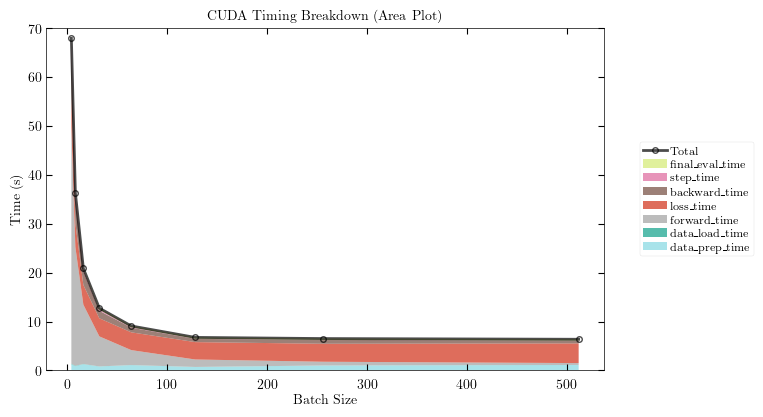

CUDA Timing Breakdown:


,batch_size,data_prep_time,data_load_time,forward_time,loss_time,backward_time,step_time,final_eval_time,total_calculated,total_reported
1,4,1.267440,0.086157,48.403400,6.23949,9.801900,1.797280,0.245248,67.840915,68.86360
3,8,0.902314,0.074618,24.233600,4.86672,5.086620,0.891387,0.241896,36.297155,36.67190
5,16,1.277860,0.035406,12.131000,4.02776,2.688260,0.444781,0.240876,20.845943,20.91570
7,32,0.815768,0.015893,6.128420,3.69364,1.530720,0.224595,0.322358,12.731394,12.56720
9,64,1.091760,0.014112,3.048420,3.63266,0.952243,0.110583,0.239796,9.089574,8.92814
11,128,0.710122,0.008771,1.521850,3.55275,0.662014,0.055453,0.240858,6.751818,6.55086
13,256,1.010690,0.008492,0.760181,3.67350,0.790827,0.027944,0.243371,6.515005,6.29135
15,512,1.119460,0.007338,0.379753,4.02313,0.589197,0.013957,0.238619,6.371454,6.14298


In [31]:
Style.set_width(7.2, 1)

# Create stacked plots for CUDA timing breakdown
timing_columns = [
    "data_prep_time",
    "data_load_time",
    "forward_time",
    "loss_time",
    "backward_time",
    "step_time",
    "final_eval_time",
]

# Prepare data
cuda_timing_data = cuda_df[timing_columns].values.T
batch_sizes = cuda_df["batch_size"].values
colors = [Style.get_color(i + 1, "2") for i in range(len(timing_columns))]

fig, ax1 = plt.subplots(1, 1, figsize=Style.get_figsize())

# Stacked Area Plot
ax1.stackplot(
    batch_sizes, *cuda_timing_data, labels=timing_columns, colors=colors, alpha=0.8
)
total_time = cuda_timing_data.sum(axis=0)
ax1.plot(batch_sizes, total_time, color="black", linewidth=2, alpha=0.7, label="Total")
ax1.set_xlabel("Batch Size")
ax1.set_ylabel("Time (s)")
ax1.set_title("CUDA Timing Breakdown (Area Plot)")
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    handles[::-1],
    labels[::-1],
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize="small",
)
ax1.set_ylim(0, 70)
plt.show()

# Show the data breakdown
print("CUDA Timing Breakdown:")
cuda_breakdown = cuda_df[["batch_size"] + timing_columns].copy()
cuda_breakdown["total_calculated"] = cuda_breakdown[timing_columns].sum(axis=1)
cuda_breakdown["total_reported"] = cuda_df["total_time"].values
display(cuda_breakdown)

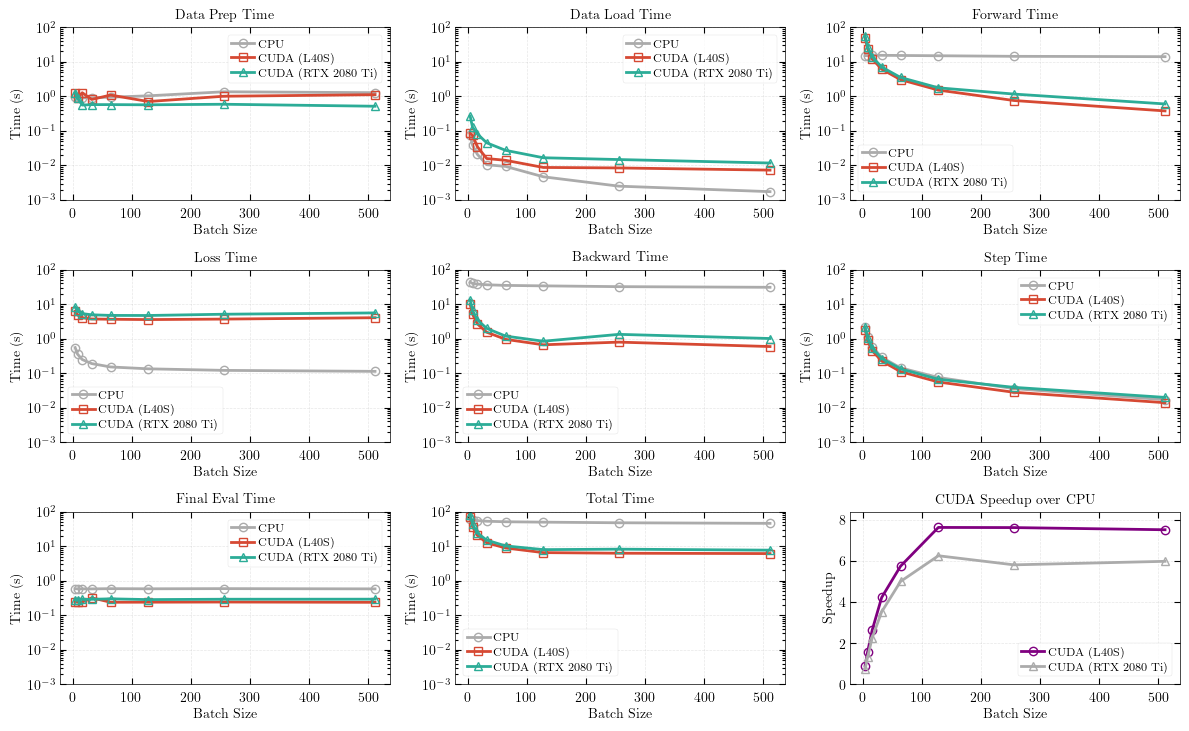

Summary Statistics:

CPU Performance:
Average total time: 52.91s
Average accuracy: 0.9173

CUDA (L40S) Performance:
Average total time: 20.87s
Average accuracy: 0.9114

CUDA Speedup: 2.54x

Average Component Times:


,Component,CPU_avg,CUDA_avg,Speedup
0,data_prep_time,1.042208,1.024427,1.017357
1,data_load_time,0.020581,0.031348,0.656513
2,forward_time,15.046888,12.075828,1.246034
3,loss_time,0.232458,4.213706,0.055167
4,backward_time,35.953887,2.762723,13.013933
5,step_time,0.548867,0.445748,1.231341
6,final_eval_time,0.588456,0.251628,2.338597


In [ ]:
Style.set_width(12, 1)

timing_components = [
    'data_prep_time', 
    'data_load_time', 
    'forward_time', 
    'loss_time', 
    'backward_time', 
    'step_time', 
    'final_eval_time',
    'total_time',
    'speedup'
]

fig, axes = plt.subplots(3, 3, figsize=Style.get_figsize())
axes = axes.flatten()

# Colors for different datasets
cpu_color = Style.get_color(3, "2")
cuda_color = Style.get_color(4, "2")
third_color = Style.get_color(2, "2") 

third_df = pd.read_csv("eval_rtx2080.csv")  
third_label = "CUDA (RTX 2080 Ti)"  

for idx, component in enumerate(timing_components):
    ax = axes[idx]

    if component == 'speedup':
        # Calculate speedup
        speedup_values = cpu_df['total_time'].values / cuda_df['total_time'].values
        ax.plot(cpu_df['batch_size'], speedup_values, 
                marker='o', label='CUDA (L40S)', color=cuda_color, linewidth=2, markersize=6)
        if third_df is not None:
            third_speedup = cpu_df['total_time'].values / third_df['total_time'].values
            ax.plot(cpu_df['batch_size'], third_speedup, 
                    marker='^', label=third_label, color=third_color, 
                    linewidth=2, markersize=6)
        ax.set_ylabel('Speedup')
        ax.set_ylim(0, np.max(speedup_values)*1.1)
        ax.set_xlabel('Batch Size')
        ax.set_title('CUDA Speedup over CPU')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize='small')
        continue
    
    # Plot CPU data
    ax.plot(cpu_df['batch_size'], cpu_df[component], 
            marker='o', label='CPU', color=cpu_color, linewidth=2, markersize=6)
    
    # Plot CUDA data
    ax.plot(cuda_df['batch_size'], cuda_df[component], 
            marker='s', label='CUDA (L40S)', color=cuda_color, linewidth=2, markersize=6)
    
    # Plot third dataset
    if third_df is not None:
        ax.plot(third_df['batch_size'], third_df[component], 
                marker='^', label=third_label, color=third_color, 
                linewidth=2, markersize=6)
    
    # Formatting
    ax.set_xlabel('Batch Size')
    if component == 'accuracy':
        ax.set_ylabel('Accuracy')
        ax.set_ylim(0.85, 0.95)  # Set reasonable range for accuracy
    else:
        ax.set_ylim(0.001, 100)
        ax.set_ylabel('Time (s)')
        ax.set_yscale('log')  # Use log scale for better visualization of time differences
    
    ax.set_title(f'{component.replace("_", " ").title()}')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize='small')


plt.tight_layout()
plt.savefig(f'plt/{csv_name[:-4]}_performance_comparison.pdf', dpi=300, bbox_inches='tight')
plt.savefig(f'plt/{csv_name[:-4]}_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("Summary Statistics:")
print("\nCPU Performance:")
print(f"Average total time: {cpu_df['total_time'].mean():.2f}s")
print(f"Average accuracy: {cpu_df['accuracy'].mean():.4f}")

print("\nCUDA (L40S) Performance:")
print(f"Average total time: {cuda_df['total_time'].mean():.2f}s")
print(f"Average accuracy: {cuda_df['accuracy'].mean():.4f}")

# Calculate speedup
speedup = cpu_df['total_time'].mean() / cuda_df['total_time'].mean()
print(f"\nCUDA Speedup: {speedup:.2f}x")

# Breakdown by component (average across all batch sizes)
print("\nAverage Component Times:")
component_comparison = pd.DataFrame({
    'Component': timing_components[:-2],  # Exclude total_time and accuracy
    'CPU_avg': [cpu_df[comp].mean() for comp in timing_components[:-2]],
    'CUDA_avg': [cuda_df[comp].mean() for comp in timing_components[:-2]]
})
component_comparison['Speedup'] = component_comparison['CPU_avg'] / component_comparison['CUDA_avg']
display(component_comparison)